<a href="https://colab.research.google.com/github/adshyam/Diabetes_Prediction_Machine_Learning-/blob/main/Diabetis_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score
import warnings
warnings.filterwarnings("ignore")






In [ ]:
data=pd.read_csv('/content/drive/My Drive/datasets_228_482_diabetes.csv')

In [ ]:
Y=pd.DataFrame(data['Outcome'])
X=data.drop(['Outcome'],axis=1)

## Exploratory Data Analysis

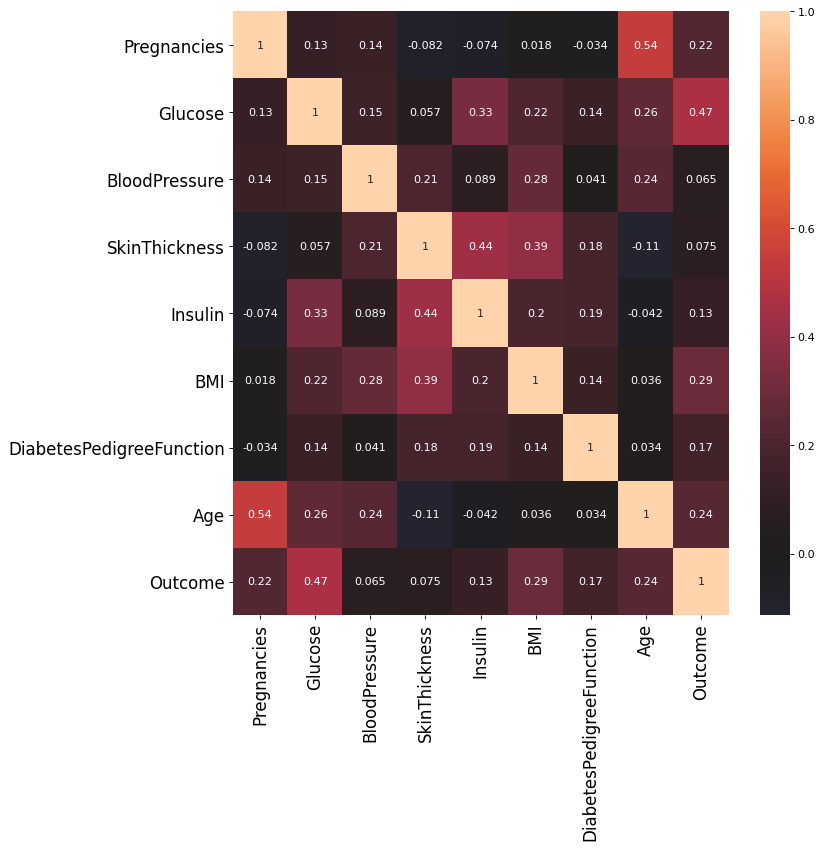

In [ ]:
plt.figure(figsize=(10,10),dpi=80)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.heatmap(data.corr(),xticklabels=data.corr().columns, yticklabels=data.corr().columns,center=0,annot=True)
plt.show()

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3d01088d0>,
      dtype=object)

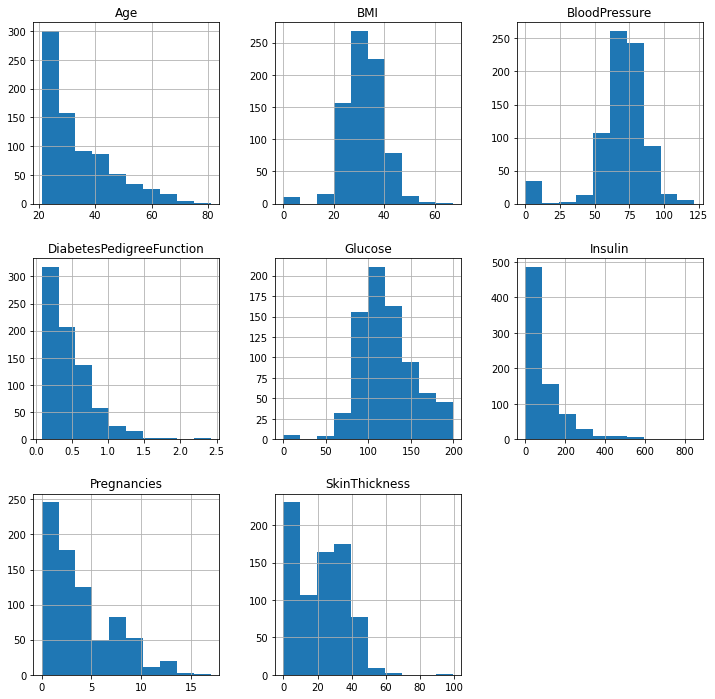

In [ ]:
X.hist(figsize=(12,12))

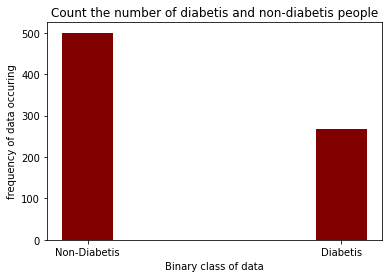

0    500
1    268
Name: Outcome, dtype: int64


In [ ]:

a=data.Outcome.value_counts()
stored={'Non-Diabetis':a[0], 'Diabetis':a[1]}
x_axis=list(stored.keys())
y_axis=list(stored.values())
plt.bar(x_axis,y_axis, color='maroon',width=0.2)
plt.xlabel('Binary class of data')
plt.ylabel('frequency of data occuring')
plt.title('Count the number of diabetis and non-diabetis people')
plt.show()
print(data.Outcome.value_counts())

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
# checking for NAN or null values
print("Number of null or NAN values:",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Number of null or NAN values: None


# Data Preprocessing





In [ ]:
# Replacing the Zero as considering outliers with the median of the values of given columns
X.Glucose.replace(0,X.Glucose.median(),inplace=True)
X.BloodPressure.replace(0,X.BloodPressure.median(),inplace=True)
X.SkinThickness.replace(0,X.SkinThickness.median(),inplace=True)
X.Insulin.replace(0,X.Insulin.median(),inplace=True)
X.BMI.replace(0,X.BMI.median(),inplace=True)


## Feature Engineering 

# Modelling

In [ ]:
# splitting the data into train and test
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15)

In [ ]:
# Applying the models
all_models=[]
all_models.append(("KNN",KNeighborsClassifier()))
all_models.append(("GNB",GaussianNB()))
all_models.append(("LRC",LogisticRegression()))
all_models.append(("DTC",DecisionTreeClassifier()))
all_models.append(("RFC",RandomForestClassifier()))
all_models.append(("XGB",XGBClassifier()))

In [ ]:
for name, model in all_models:
  model.fit(X_train,Y_train)
  predicted=model.predict(X_test)
  score=accuracy_score(Y_test,predicted)
  print("The name and score of the model is:", name, score)

The name and score of the model is: KNN 0.7155172413793104
The name and score of the model is: GNB 0.7758620689655172
The name and score of the model is: LRC 0.7413793103448276
The name and score of the model is: DTC 0.6637931034482759
The name and score of the model is: RFC 0.7672413793103449
The name and score of the model is: XGB 0.7672413793103449


# Hyper Parameter Tuning Using Rnadomized Search CV method

First we applied bunch of modelling, we see that  Random Forest Classifier has the highest accuracy score. So, we pick uo this model for hyper parameter tuning

In [ ]:
model=RandomForestClassifier()
params={'max_depth':[2,3,4,5,6,7,8],
           'max_features':[2,3,5],
           'n_estimators':[50,60,70,90],
           'min_samples_split':[10,15,20],
           'bootstrap':[True],
           }
tuning=RandomizedSearchCV(model,params,n_iter=5,cv=5,n_jobs=-1,random_state=40,verbose=2)
tuning.fit(X_train,Y_train)
# score=accuracy_score(Y_test, model.predict(X_test))
# tuning.best_paramete()



Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
tuning.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 2,
 'min_samples_split': 10,
 'n_estimators': 90}

In [ ]:
model=RandomForestClassifier(bootstrap= True,
 max_depth= 4,
 max_features= 2,
 min_samples_split=10,
 n_estimators= 90,
 random_state=40)
model.fit(X_train,Y_train)
score=accuracy_score(Y_test,model.predict(X_test))
print(score)

0.7931034482758621
